<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.


In [67]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화하세요.
- **(Urclass Quiz) 타겟과 상관관계가 가장 높은 특성의 이름을 제출하세요.**

In [68]:
### 이곳에서 과제를 진행해 주세요 ###
df.corr().sort_values(by='price',ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
grade,0.008130,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,-0.010842,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_living15,-0.002901,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,0.086463,0.280439,-0.092824,0.713202,0.731870,0.200355,0.326229,-0.002673,-0.279033,0.048858,0.334605,1.000000,0.183192
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
sqft_basement,-0.005151,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
lat,-0.001891,0.307003,-0.008931,0.024573,0.052529,-0.085683,0.049614,-0.014274,0.006157,-0.014941,0.114084,-0.000816,0.110538,-0.148122,0.029398,0.267048,1.000000,-0.135512,0.048858,-0.086419


### 2) sqft_living 와 price의 scatter plot을 그리고 기준모델을 시각화해 보세요.
- **(Urclass Quiz) 기준모델의 값을 제출하세요. (소숫점 이하 반올림)**

540088.1417665294


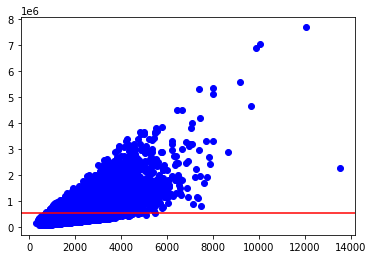

In [69]:
### 이곳에서 과제를 진행해 주세요 ###
import matplotlib.pyplot as plt

# Scatterplot 그리기

plt.scatter(df['sqft_living'], df['price'], color='blue', linewidth=1) #helpdesk : scatter plot이 이상함...(price값이 안나오고 1,2,3...이 나옴)

# 평균기준모델 시각화

print(df['price'].mean())

plt.axhline(y=df['price'].mean(), color='r', linestyle='-')
plt.show()

### 3) Scikit-Learn 라이브러리를 사용해 특성 sqft_living에 대한 선형회귀모델을 만들어 보세요.
- **(Urclass Quiz) sqft_living 값이 15000인 경우에 모델이 예측하는 주택 가격을 제출하세요.(소수점 이하 반올림)**

In [70]:
### 이곳에서 과제를 진행해 주세요 ###
from sklearn.linear_model import LinearRegression

model = LinearRegression()

feature = ['sqft_living']
target = ['price']
X_train = df[feature]
y_train = df[target]

model.fit(X_train, y_train)

X_test = [[15000]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} sqft_living를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

15000 sqft_living를 가지는 주택의 예상 가격은 $4165772 입니다.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **(Urclass Quiz) sqft_living 특성에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [54]:
### 이곳에서 과제를 진행해 주세요 ###

print(model.coef_)

def explain_prediction(sqft_living):
    y_pred = model.predict([[sqft_living]])
    pred = f"{int(sqft_living)} sqft_living 주택 가격 예측: ${int(y_pred[0])} (1 sqft_living당 추가금: ${int(model.coef_[0])})"

    return pred

explain_prediction(1) #1sqft_living당 변하는 값이 model.coef_와 같은 것을 확인할 수 있음


[[280.6235679]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


'1 sqft_living 주택 가격 예측: $-43300 (1 sqft_living당 추가금: $280)'

### 5) bathrooms 특성을 사용하여 모델을 만들어보고 비교해 보세요.
- **(Urclass Quiz) bathrooms에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [55]:
### 이곳에서 과제를 진행해 주세요 ###

model = LinearRegression()

feature = ['bathrooms']
target = ['price']
X_train = df[feature]
y_train = df[target]

model.fit(X_train, y_train)

X_test = [[2]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} bathrooms를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')
print(model.coef_)


2 bathrooms를 가지는 주택의 예상 가격은 $511361 입니다.
[[250326.5163021]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## 🔥도전과제 (Github - Discussion) 

### 공지로 안내드리는 Github - Discussion 페이지에 올려보세요:)

### 6) 단순선형회귀모델을 만들기 위해 전제되어야 하는 조건들에 대해 찾아보시고 논해보세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 본인의 언어로 설명해 보세요.